# Project done by Samuel Nnamani
#### Email: sammysttheanalyst@gmail.com
#### Website: https://www.sammysttheanalyst.github.io

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv("bank-full.csv", sep=";")
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Check for outliers

<Axes: >

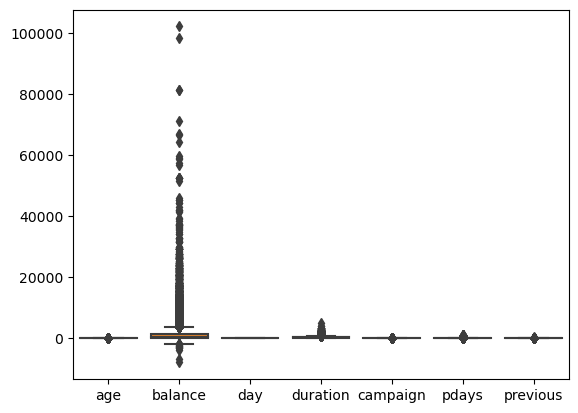

In [3]:
sns.boxplot(df1)

# Statistical objectives

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df1.corr()

C:\Users\MAX TECH STORE\AppData\Local\Temp\ipykernel_13120\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: ylabel='Density'>

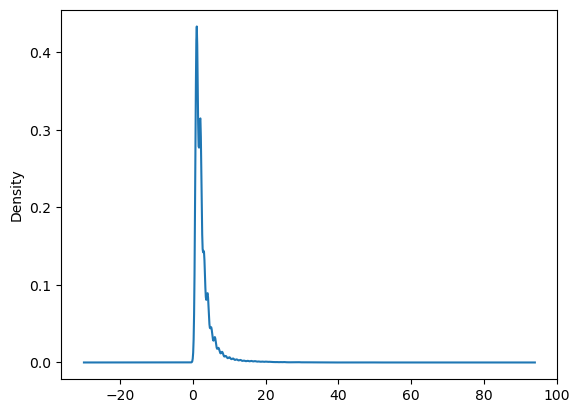

In [9]:
df1["campaign"].plot(kind="density")

### From all indications, it appears I would need to transform the data before building the machine learning model

# Data Transformation

### 1. Rescaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Before transforming the data, I need to assighn the values "Yes" and "No" depending on 1 and 0 values on the y column

outcome_list = []
for i in df1["y"]:
    if "yes" in i:
        ans = 1
    else:
        ans = 0
    outcome_list.append(ans)

In [12]:
# Converting the list into a column in the data
df1["Outcome_num"] = outcome_list

In [13]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Outcome_num'],
      dtype='object')

In [14]:
# Converting the dataframe to numpy array
# Since there are both categorical and numerical variables in the data, i would separate the data into two different
# variable containers

df1Cat = df1[["job","marital","education","default","housing","loan","contact","month","poutcome","y"]]
df1Num = df1[["age","balance","day","duration","campaign","pdays","previous","Outcome_num"]]
df1Num

,age,balance,day,duration,campaign,pdays,previous,Outcome_num
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


In [15]:
df1NumArr = df1Num.values
df1NumArr

array([[  58, 2143,    5, ...,   -1,    0,    0],
       [  44,   29,    5, ...,   -1,    0,    0],
       [  33,    2,    5, ...,   -1,    0,    0],
       ...,
       [  72, 5715,   17, ...,  184,    3,    1],
       [  57,  668,   17, ...,   -1,    0,    0],
       [  37, 2971,   17, ...,  188,   11,    0]], dtype=int64)

In [16]:
# Separate into input variable and output variable

x = df1NumArr[:,0:7]
y = df1NumArr[:,7]
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(x)
set_printoptions(precision=3)
print(rescaledx)

[[0.519 0.092 0.133 ... 0.    0.    0.   ]
 [0.338 0.073 0.133 ... 0.    0.    0.   ]
 [0.195 0.073 0.133 ... 0.    0.    0.   ]
 ...
 [0.701 0.125 0.533 ... 0.065 0.212 0.011]
 [0.506 0.079 0.533 ... 0.048 0.    0.   ]
 [0.247 0.1   0.533 ... 0.016 0.217 0.04 ]]


In [18]:
# Adding the rescaled data into the data

rescaledxdf1 = pd.DataFrame(rescaledx, columns=["age","balance","day","duration","campaign","pdays","previous"])
rescaledxdf1.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0


In [19]:
# Adding the outcome variable into the dataframe

rescaledxdf1["Outcome_num"] = y

### 2. Standardizing

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Changing the dataframe into array

rescaledxdf1_Arr = rescaledxdf1.values
rescaledxdf1_Arr

array([[0.519, 0.092, 0.133, ..., 0.   , 0.   , 0.   ],
       [0.338, 0.073, 0.133, ..., 0.   , 0.   , 0.   ],
       [0.195, 0.073, 0.133, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.701, 0.125, 0.533, ..., 0.212, 0.011, 1.   ],
       [0.506, 0.079, 0.533, ..., 0.   , 0.   , 0.   ],
       [0.247, 0.1  , 0.533, ..., 0.217, 0.04 , 0.   ]])

In [22]:
# Splitting the array into input and output variable or features

X = rescaledxdf1_Arr[:,0:7]
Y = rescaledxdf1_Arr[:,7]

In [23]:
# Fitting and Transforming the dataset

scaler = StandardScaler().fit(X)
standardx = scaler.transform(X)
set_printoptions(precision=3)

# View the array
standardx

array([[ 1.607,  0.256, -1.298, ..., -0.569, -0.411, -0.252],
       [ 0.289, -0.438, -1.298, ..., -0.569, -0.411, -0.252],
       [-0.747, -0.447, -1.298, ..., -0.569, -0.411, -0.252],
       ...,
       [ 2.925,  1.43 ,  0.143, ...,  0.722,  1.436,  1.05 ],
       [ 1.513, -0.228,  0.143, ...,  0.399, -0.411, -0.252],
       [-0.371,  0.528,  0.143, ..., -0.247,  1.476,  4.524]])

In [24]:
# Changing the array back into dataframe

standard_df = pd.DataFrame(standardx, columns=["age","balance","day","duration","campaign","pdays","previous"])

# Adding back the output feature

standard_df["Outcome"] = Y

# Reading the top records

standard_df.head()

,age,balance,day,duration,campaign,pdays,previous,Outcome
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0.0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0.0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0.0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0.0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0.0


### 2. Normalization

In [25]:
from sklearn.preprocessing import Normalizer

In [26]:
# Changing the dataframe into array

standard_Arr = standard_df.values

In [27]:
# Splitting the array into input and output variable/feature

X = standard_Arr[:,0:7]
Y = standard_Arr[:,7]

# Fitting and transforming the data

normal = Normalizer().fit(X).transform(X)

# View the array

normal

array([[ 0.727,  0.116, -0.587, ..., -0.257, -0.186, -0.114],
       [ 0.176, -0.267, -0.792, ..., -0.347, -0.251, -0.154],
       [-0.399, -0.239, -0.694, ..., -0.304, -0.22 , -0.135],
       ...,
       [ 0.577,  0.282,  0.028, ...,  0.142,  0.283,  0.207],
       [ 0.787, -0.119,  0.075, ...,  0.208, -0.214, -0.131],
       [-0.077,  0.109,  0.03 , ..., -0.051,  0.306,  0.937]])

In [28]:
# Changing the array back into a dataframe

normalized_df = pd.DataFrame(normal, columns=["age","balance","day","duration","campaign","pdays","previous"])

# Adding back the output feature

normalized_df["Outcome_num"] = Y

In [29]:
# Reading the top records of the data

normalized_df.head()

,age,balance,day,duration,campaign,pdays,previous,Outcome_num
0,0.726607,0.115943,-0.587121,0.004981,-0.257438,-0.186043,-0.113918,0.0
1,0.175882,-0.266933,-0.791529,-0.253664,-0.347066,-0.250815,-0.153578,0.0
2,-0.399408,-0.238753,-0.693915,-0.378019,-0.304265,-0.219884,-0.134639,0.0
3,0.330379,0.027310,-0.751227,-0.373295,-0.329395,-0.238044,-0.145759,0.0
4,-0.427529,-0.255751,-0.742773,-0.133639,-0.325688,-0.235365,-0.144118,0.0


<Axes: ylabel='Density'>

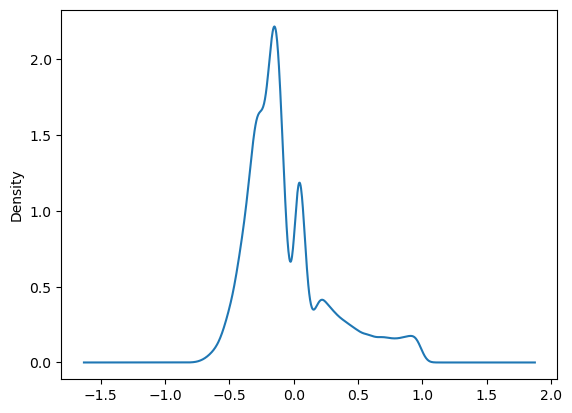

In [30]:
normalized_df["campaign"].plot(kind="density")

<Axes: ylabel='Density'>

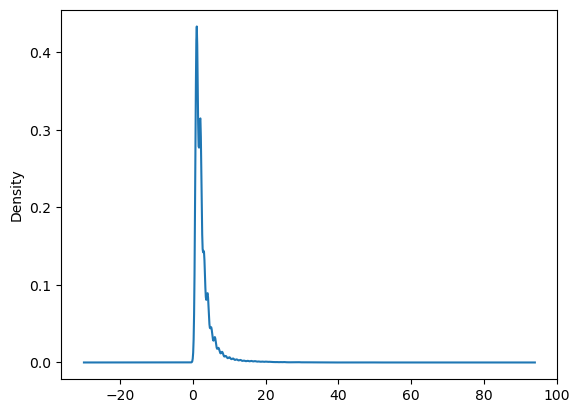

In [31]:
df1["campaign"].plot(kind="density")

# Data Modelling

In [33]:
# Create X variables
X = normalized_df.drop("Outcome_num", axis=1)

# Create Y variables
Y = normalized_df["Outcome_num"]

In [51]:
# Importing variable
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [52]:
# import the model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Fit the model into the data
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [53]:
# Make a prediction

Y_preds = clf.predict(X_test)
Y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
# Evaluate the model on the train data

clf.score(X_train, Y_train)

1.0

In [55]:
# Evaluate the model on the test data

clf.score(X_test, Y_test)

0.8919197876732528

In [56]:
# Checking for accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, Y_preds))

0.8919197876732528


In [57]:
# Checking for confusion_matrix

confusion_matrix(Y_test, Y_preds)

array([[11624,   334],
       [ 1132,   474]], dtype=int64)

In [58]:
# Checking for classification_report

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     11958
         1.0       0.59      0.30      0.39      1606

    accuracy                           0.89     13564
   macro avg       0.75      0.63      0.67     13564
weighted avg       0.87      0.89      0.88     13564



In [59]:
# Trying to improve the model
# Use different n-estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100: .2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set:  88.62%

Trying model with 20 estimators...
Model accuracy on test set:  88.82%

Trying model with 30 estimators...
Model accuracy on test set:  89.02%

Trying model with 40 estimators...
Model accuracy on test set:  88.99%

Trying model with 50 estimators...
Model accuracy on test set:  88.82%

Trying model with 60 estimators...
Model accuracy on test set:  89.04%

Trying model with 70 estimators...
Model accuracy on test set:  89.04%

Trying model with 80 estimators...
Model accuracy on test set:  89.14%

Trying model with 90 estimators...
Model accuracy on test set:  89.01%



In [62]:
# Saving the model

import pickle
pickle.dump(clf, open("RandomForest Model on Bank customer loan.pkl", "wb"))